In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = ('Data\informatics-edu-diabetes-prediction\Diabetes_Classification.xlsx')

data = pd.read_excel(file)

In [3]:
data.shape

(390, 18)

In [4]:
data.dtypes

Patient number       int64
Cholesterol          int64
Glucose              int64
HDL Chol             int64
Chol/HDL ratio     float64
Age                  int64
Gender              object
Height               int64
Weight               int64
BMI                float64
Systolic BP          int64
Diastolic BP         int64
waist                int64
hip                  int64
Waist/hip ratio    float64
Diabetes            object
Unnamed: 16        float64
Unnamed: 17        float64
dtype: object

In [5]:
data.head(100)

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,248,94,69,3.6,34,male,71,190,26.5,132,86,36,42,0.86,No diabetes,NaN,NaN
96,97,217,88,40,5.4,34,male,73,219,28.9,145,100,41,42,0.98,No diabetes,NaN,NaN
97,98,224,71,42,5.3,34,female,60,165,32.2,135,80,34,46,0.74,No diabetes,NaN,NaN
98,99,171,85,61,2.8,34,female,63,164,29.0,120,80,34,43,0.79,No diabetes,NaN,NaN


In [6]:
data =data.drop(columns=['Unnamed: 16', 'Unnamed: 17'])

In [7]:
corr = data.corr()
corr

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
Patient number,1.000000,0.252092,0.307722,-0.000842,0.188649,0.988888,-0.063513,-0.042151,-0.002971,0.450950,0.084154,0.156468,0.012499,0.274683
Cholesterol,0.252092,1.000000,0.158102,0.193162,0.475927,0.247333,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847
Glucose,0.307722,0.158102,1.000000,-0.158302,0.282210,0.294392,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117
HDL Chol,-0.000842,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777
Chol/HDL ratio,0.188649,0.475927,0.282210,-0.681867,1.000000,0.163201,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329
Age,0.988888,0.247333,0.294392,0.028210,0.163201,1.000000,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188
Height,-0.063513,-0.063601,0.098052,-0.087238,0.081162,-0.082229,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548
Weight,-0.042151,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461
BMI,-0.002971,0.091695,0.129286,-0.241860,0.228407,-0.009164,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873
Systolic BP,0.450950,0.207741,0.162777,0.031807,0.115505,0.453417,-0.040704,0.097497,0.121408,1.000000,0.603662,0.210934,0.155321,0.137871


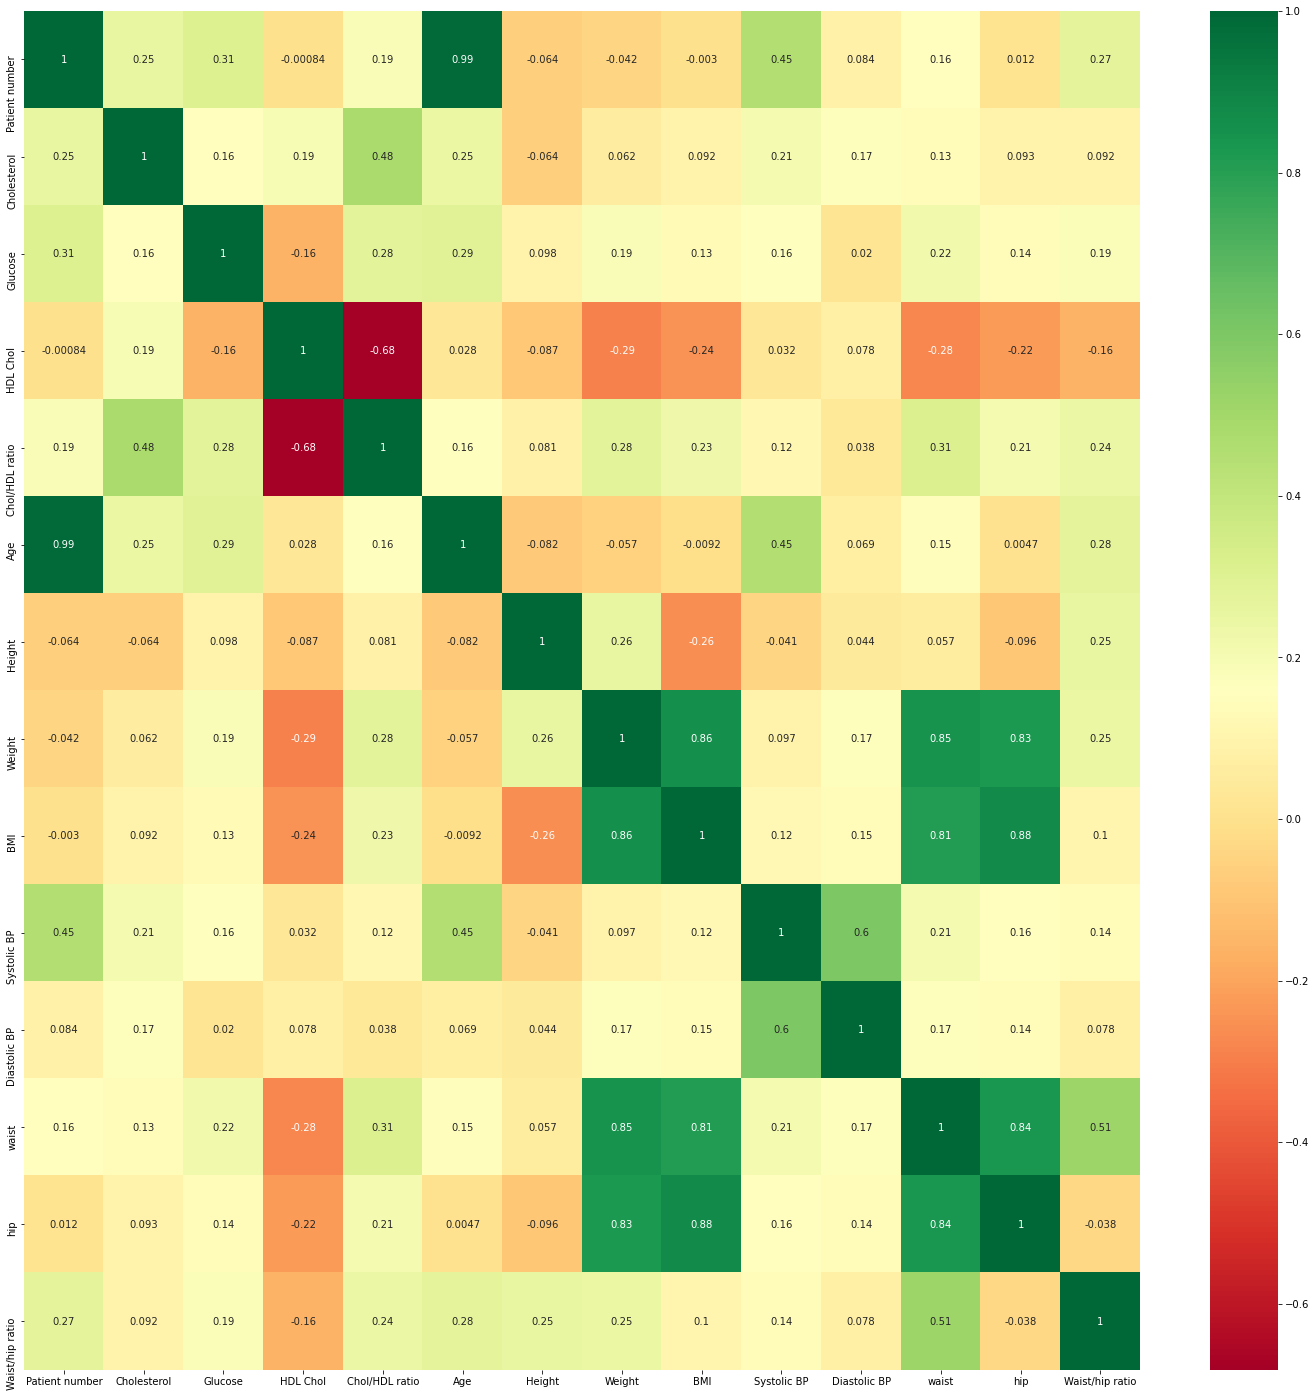

In [8]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
print(f'Voordat we de null-waardes droppen hebben we: {len(data)} in de dataset')
print(data.isnull().sum())

#drop all rows which containt atleast 1 NaN
data.dropna(inplace=True)
print(f'Nadat we de null-waardes droppen hebben we: {len(data)}  in de dataset')

Voordat we de null-waardes droppen hebben we: 390 in de database
Patient number     0
Cholesterol        0
Glucose            0
HDL Chol           0
Chol/HDL ratio     0
Age                0
Gender             0
Height             0
Weight             0
BMI                0
Systolic BP        0
Diastolic BP       0
waist              0
hip                0
Waist/hip ratio    0
Diabetes           0
dtype: int64
Nadat we de null-waardes droppen hebben we: 390  in de database


In [10]:
def column_outlier(strength, dataframe, columns):
    temp_dataframe = dataframe.copy()
    try:
        if strength == 's':
            strength=3
        elif strength == 'a':
            strength=1.5
    except:
        print("Invalid strength")
    for column in columns:
        Q1 = temp_dataframe[column].quantile(0.25)
        Q3 = temp_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        temp_dataframe = temp_dataframe[~((temp_dataframe[column] < (Q1 - strength * IQR)) |(temp_dataframe[column] > (Q3 + strength* IQR)))]
    return temp_dataframe

In [11]:
mean_chol_df = column_outlier('a', data.copy(), ['Cholesterol'])[['Cholesterol', 'Age']].groupby('Age', as_index = False).mean()
mean_chol_df

,Age,Cholesterol
0,19,169.500000
1,20,186.600000
2,21,182.333333
3,22,182.600000
4,23,187.000000
...,...,...
63,83,227.000000
64,84,226.000000
65,89,301.000000
66,91,232.000000


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

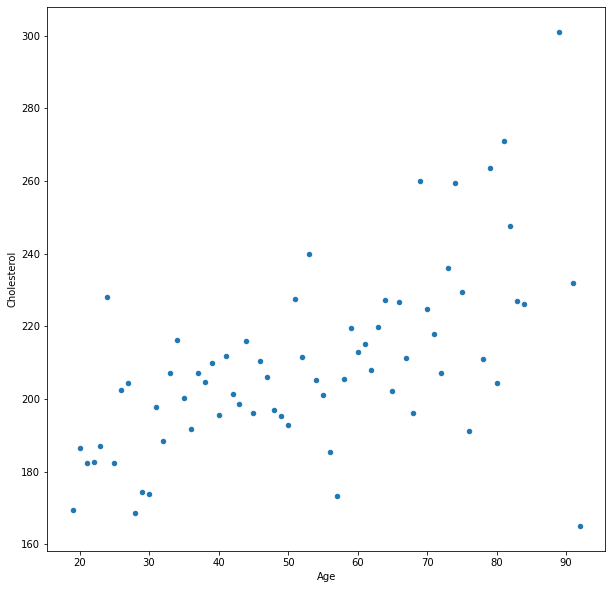

In [26]:
x = 'Age'
y = 'Cholesterol'

tplot = mean_chol_df[['Age','Cholesterol']]
tplot.sort_values(['Age'], ascending=True, inplace=True)
tplot.dropna(inplace=True)

tplot.plot(x=x, y=y, kind='scatter',figsize=(10,10))

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

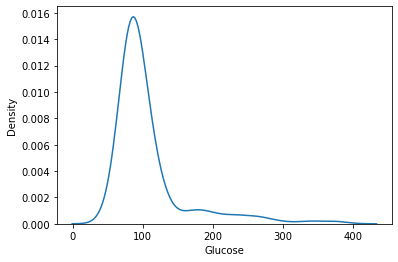

In [197]:
sns.kdeplot(data.Glucose)

In [17]:
diabetes_map = {"Diabetes": 1, "No diabetes": 0}

In [18]:
data['Diabetes'] = data['Diabetes'].map(diabetes_map)

In [22]:
diabetes_true_count = len(data.loc[data['Diabetes'] == 1])
diabetes_false_count = len(data.loc[data['Diabetes'] == 0])

In [23]:
(diabetes_true_count,diabetes_false_count)


(60, 330)

In [29]:
data.corr()['Diabetes']

Patient number     0.317830
Cholesterol        0.204262
Glucose            0.689080
HDL Chol          -0.123133
Chol/HDL ratio     0.272987
Age                0.301995
Height             0.023466
Weight             0.162987
BMI                0.145274
Systolic BP        0.198600
Diastolic BP       0.049351
waist              0.223378
hip                0.143792
Waist/hip ratio    0.175623
Diabetes           1.000000
Name: Diabetes, dtype: float64

In [200]:
dt_df1 = data.copy()[['Glucose', 'Age', 'Cholesterol',
                      'Diabetes','Chol/HDL ratio']].dropna()

X = dt_df1.drop(columns = ['Diabetes'])
y = dt_df1['Diabetes']

In [201]:
print("total number of rows : {0}".format(len(dt_df1)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing Cholesterol: {0}".format(len(data.loc[data['Cholesterol'] == 0])))

total number of rows : 390
number of rows missing Glucose: 0
number of rows missing Age: 0
number of rows missing Cholesterol: 0


In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)


In [203]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [210]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy of random_forest_model = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
Accuracy = 0.719

Accuracy of random_forest_model = 0.872


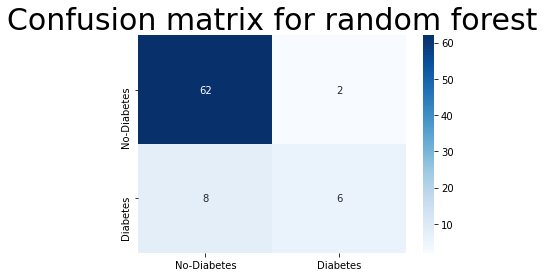

In [230]:
from sklearn.metrics import confusion_matrix

# plotting confusion mtrix
cm = confusion_matrix(y_test, predict_train_data)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for random forest', fontsize = 30); # title with fontsize 20

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
clf = DecisionTreeClassifier(max_depth = 7, random_state = 0) #Hyperparameter : 7 
clf.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=7, random_state=0)

In [221]:
predict_train_data2 = clf.predict(X_test)

from sklearn import metrics

print("Accuracy Of DecisionTreeClassifier = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data2)))

Accuracy Of DecisionTreeClassifier = 0.846


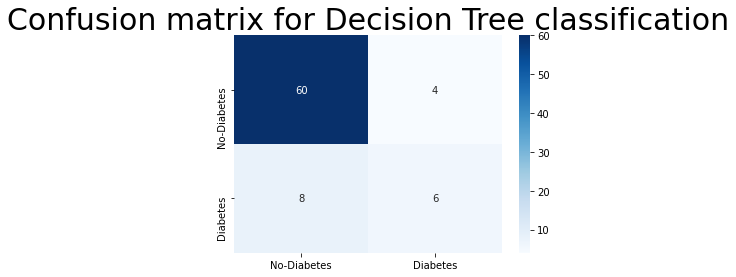

In [229]:
from sklearn.metrics import confusion_matrix

# plotting confusion mtrix
cm = confusion_matrix(y_test, predict_train_data2)
class_label = ["No-Diabetes", "Diabetes"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree classification', fontsize = 30); # title with fontsize 20


In [239]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

In [240]:
#building model
class Keras_Model(keras.Model):
    def __init__(self):
        super(Keras_Model, self).__init__()

        self.act = keras.layers.Activation("relu")
        self.dropout = keras.layers.Dropout(0.25)

        self.block_1 = keras.Sequential()
        for i in range(1):
            self.block_1.add(keras.layers.Dense(128))
            self.block_1.add(self.act)
#             self.block_1.add(self.dropout)

        self.block_2 = keras.Sequential()
        for i in range(1):
            self.block_2.add(keras.layers.Dense(64))
            self.block_2.add(self.act)
#             self.block_2.add(self.dropout)

        self.block_3 = keras.Sequential()
        for i in range(1):
            self.block_3.add(keras.layers.Dense(32))
            self.block_3.add(self.act)
            self.block_3.add(self.dropout)

        self.fc_out = keras.layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=None, mask=None):
        x = self.block_1(inputs)

        x = self.block_2(x)

        x = self.block_3(x)

        x = self.fc_out(x)
        return x

    def get_config(self):
        config = super(Keras_Model, self).get_config()
        config.update()
        return config

In [241]:
# callbacks
def lr_scheduler(base_lr, epochs):
    def scheduler(epoch, lr):
        p = epoch / epochs

        if p > 0.9:
            lr_n = base_lr * 1e-3

        elif p > 0.75:
            lr_n = base_lr * 1e-2

        elif p >= 0.5:
            lr_n = base_lr * 1e-1

        else:
            lr_n = lr

        print(f"[INFO] {epoch + 1}/{epochs} LR From ", lr, " to ", lr_n)

        return lr_n

    return LearningRateScheduler(scheduler)

In [242]:
learning_rate = 5e-3
epochs = 50

opt = keras.optimizers.SGD(
    learning_rate=learning_rate,
    momentum=0.9,
    decay=1e-4,
)
model = Keras_Model()
model.compile(
    optimizer=opt,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["mae", "acc"]
)


In [243]:
history = model.fit(
        x=X_train, y=y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        callbacks=[lr_scheduler(base_lr=learning_rate, epochs=epochs)],
        verbose=0,
    )

[INFO] 1/50 LR From  0.004999999888241291  to  0.004999999888241291

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[INFO] 2/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 3/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 4/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 5/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 6/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 7/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 8/50 LR From  0.004999999

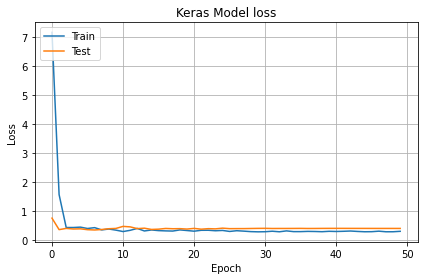

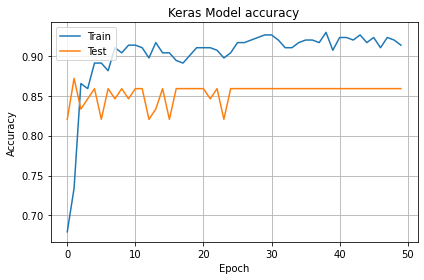

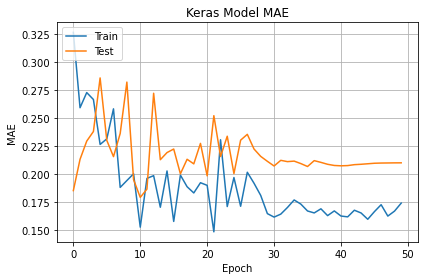

In [244]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Keras Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Keras Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Keras Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [246]:
log = model.evaluate(X_test,y_test)

print(f"\nTest Loss: {log[0]}\nTest Accuracy: {log[2]}\nTest MAE: {log[1]}")

3/3 [==============================] - 0s 981us/step - loss: 0.4078 - mae: 0.2099 - acc: 0.8590

Test Loss: 0.4078074097633362
Test Accuracy: 0.8589743375778198
Test MAE: 0.20992308855056763
